In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



days =yf.download('DOGE-USD','2019-12-02',datetime.date.today())
days.fillna(0)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-01,0.002320,0.002394,0.002257,0.002292,0.002292,77007809
2019-12-02,0.002293,0.002312,0.002204,0.002235,0.002235,66782510
2019-12-03,0.002234,0.002256,0.002167,0.002217,0.002217,62508732
2019-12-04,0.002217,0.002241,0.002165,0.002208,0.002208,73151442
2019-12-05,0.002209,0.002305,0.002172,0.002223,0.002223,66757792
...,...,...,...,...,...,...
2021-03-23,0.054941,0.056081,0.052940,0.053556,0.053556,1040781777
2021-03-24,0.053528,0.056494,0.051242,0.051702,0.051702,934537959
2021-03-25,0.051699,0.052407,0.049697,0.051448,0.051448,1084214116


In [3]:
elon_musk = '2021-02-03' #https://twitter.com/elonmusk/status/1357231313376456708

before= days[:elon_musk]
x_1_days=np.array(before.index, dtype='datetime64')
y_1_open = np.array(before['Open'],dtype='float')
y_1_close = np.array(before['Close'],dtype='float')

after= days[elon_musk:]
x_2_days=np.array(after.index, dtype='datetime64')
y_2_open = np.array(after['Open'],dtype='float')
y_2_close = np.array(after['Close'],dtype='float')


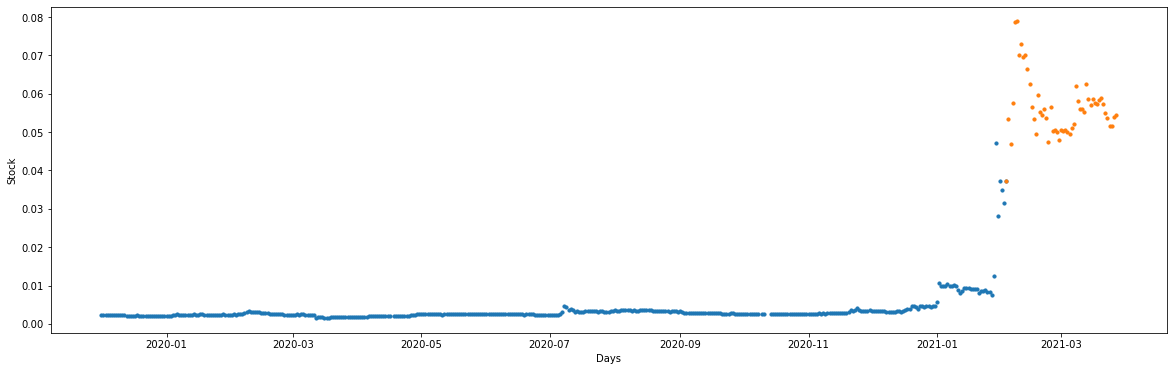

In [4]:
#Előtti, utáni időszak
#

# plot
plt.figure(figsize=(20,6))

plt.scatter(x_1_days,y_1_close, s=10)
plt.xlabel('Days')
plt.ylabel('Stock')

plt.scatter(x_2_days,y_2_close, s=10)
plt.xlabel('Days')
plt.ylabel('Stock')
plt.show()




Text(0, 0.5, 'Close')

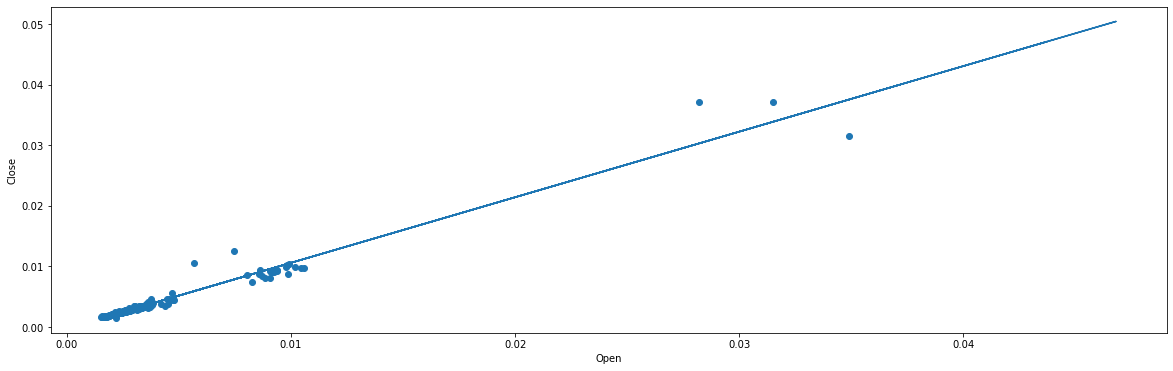

In [53]:
#Előtti időszak
#Open/Close szempont

plt.figure(figsize=(20,6))

x = y_1_open
y = y_1_close
train_x, test_x, train_y,test_y = train_test_split(x,y,test_size=0.25)

regression =LinearRegression()
model = regression.fit(train_x[:,np.newaxis],train_y)
plt.scatter(train_x,train_y)
plt.plot(test_x,model.predict(test_x[:,np.newaxis]))
plt.xlabel('Open')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

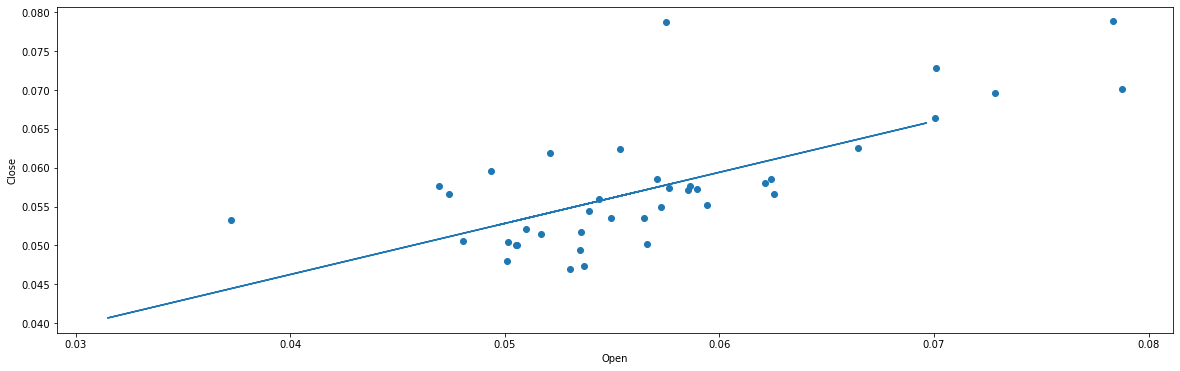

In [54]:
#Utáni időszak
#Open/Close szempont
plt.figure(figsize=(20,6))

x = y_2_open
y = y_2_close

train_x, test_x, train_y,test_y = train_test_split(x,y,test_size=0.25)

regression =LinearRegression()
model = regression.fit(train_x[:,np.newaxis],train_y)
plt.scatter(train_x,train_y)
plt.plot(test_x,model.predict(test_x[:,np.newaxis]))
plt.xlabel('Open')
plt.ylabel('Close')

<ipython-input-55-5cfdb0f3f9ae>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model = regression.fit(train_x[:,np.newaxis],train_y)
<ipython-input-55-5cfdb0f3f9ae>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(test_x,model.predict(test_x[:,np.newaxis]))


Text(0, 0.5, 'Close')

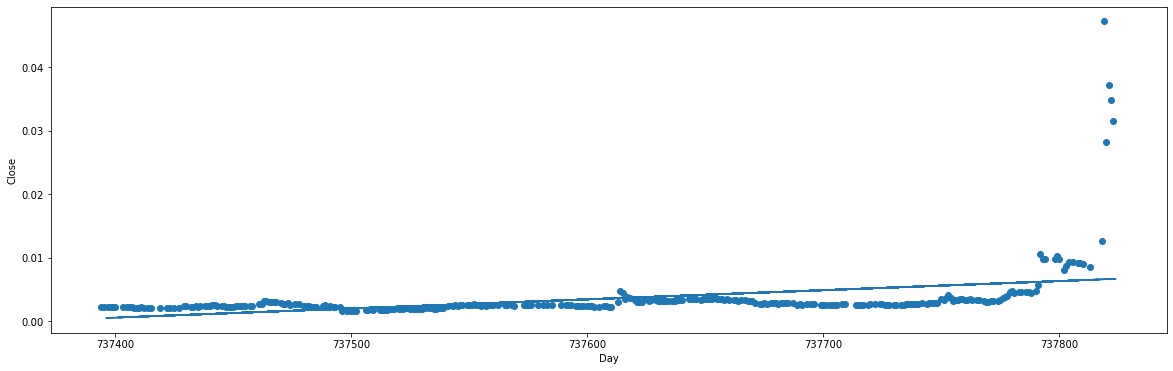

In [55]:
#Előtti időszak
#Days/Close szempont

plt.figure(figsize=(20,6))

day_label = pd.to_datetime(x_1_days).map(datetime.datetime.toordinal)


y = y_1_close
train_x, test_x, train_y,test_y = train_test_split(day_label,y,test_size=0.25)

regression =LinearRegression()
model = regression.fit(train_x[:,np.newaxis],train_y)
plt.scatter(train_x,train_y)
plt.plot(test_x,model.predict(test_x[:,np.newaxis]))
plt.xlabel('Day')
plt.ylabel('Close')


<ipython-input-56-16c18079762c>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model = regression.fit(train_x[:,np.newaxis],train_y)
<ipython-input-56-16c18079762c>:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(test_x,model.predict(test_x[:,np.newaxis]))


Text(0, 0.5, 'Close')

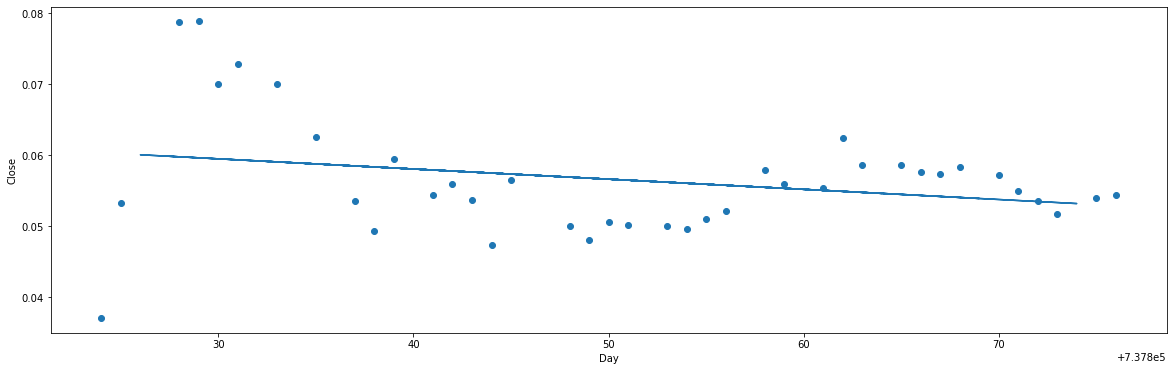

In [56]:
#Utáni időszak
#Days/Close szempont

plt.figure(figsize=(20,6))

day_label = pd.to_datetime(x_2_days).map(datetime.datetime.toordinal)


y = y_2_close
train_x, test_x, train_y,test_y = train_test_split(day_label,y,test_size=0.25)

regression =LinearRegression()
model = regression.fit(train_x[:,np.newaxis],train_y)


plt.scatter(train_x,train_y)
plt.plot(test_x,model.predict(test_x[:,np.newaxis]))
plt.xlabel('Day')
plt.ylabel('Close')

<ipython-input-44-bbc069d5135b>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model = regression.fit(train_x[:,np.newaxis],train_y)
<ipython-input-44-bbc069d5135b>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(test_x,model.predict(test_x[:,np.newaxis]))


Text(0, 0.5, 'Close')

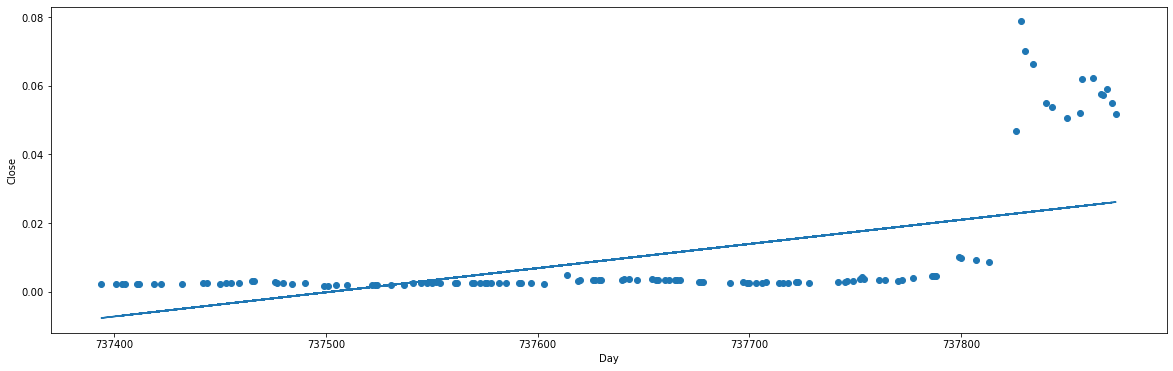

In [ ]:
#Előtti, utáni időszak
#Days/Close szempont
plt.figure(figsize=(20,6))
day_label = pd.to_datetime(days.index).map(datetime.datetime.toordinal)


y = days['Close']
train_x, test_x, train_y,test_y = train_test_split(day_label,y,test_size=0.25)

regression =LinearRegression()
model = regression.fit(train_x[:,np.newaxis],train_y)


plt.scatter(train_x,train_y)
plt.plot(test_x,model.predict(test_x[:,np.newaxis]))
plt.xlabel('Day')
plt.ylabel('Close')